# Week 8 - Solving nonlinear equations: Root-finding algorithms

Charlotte Desvages

Nonlinear equations take the form

$$
F(x) = 0,
$$

where $F(x)$ is a nonlinear function of $x$. For the moment we consider nonlinear equations of a single variable.

Solving the equation is the same as finding the root(s) $x_\ast$ of $F$.

Many problems in mathematical modelling deal with nonlinear equations. Often they come up in:
- solving differential equations numerically with an *implicit* method,
- *optimisation* problems: find $x$ which minimises/maximises $F(x)$ (i.e. solve $F'(x) = 0$). More on that in Weeks 10/11!

Some nonlinear equations have closed-form solutions:
- $3x^2 - 4x + 2 = 8x^3 - 3$
- $x^8 - 4x^4 = 1$
- $\cos^2(x) = a$
- etc...

...but most don't:
- $x e^x = -\sin(2x)$
- $\cos(x) \cosh(x) = a$
- Most polynomials of degree 5 and above (Abel-Ruffini, Galois)
- etc...

We can use **numerical methods** to compute approximated solutions.

## Iterative methods to solve nonlinear equations

Most **algorithms** used to compute solutions of nonlinear equations are **iterative**:
1. we start with a **guess** for where the root may be;
2. if we are **close enough** to the solution, we stop (we say that the algorithm has **converged**);
3. if not, we **refine our guess** using information we have about the function;
4. we **go back to step 1** with our new guess.

The difference between the different methods is how they do **step 3**.

The general idea behind these methods is to simplify/approximate the nonlinear problem with a simpler linear problem, which we solve repeatedly until convergence is achieved.

### Convergence criteria

How do we know when we are close enough to the solution, if we don't know the solution in advance?

We set a desired **tolerance**, i.e. a margin of error which we're happy to tolerate for the computed solution -- a desired precision.

Let $x_k$ be our current guess at the $k$th iteration. Generally, we use one of these two criteria:
- stop when $|F(x_k)| < \varepsilon$ for some small tolerance $\varepsilon > 0$, i.e. when $F(x_k)$ is sufficiently close to zero,
- stop when $|x_k - x_{k-1}| < \delta$ for some small tolerance $\delta > 0$, i.e. when refining the current guess only provides very small improvements, indicating that we have likely converged.

## Bracketing methods: bisection and regula falsi

**Bracketing methods** seek to find smaller and smaller **intervals** $[a, b]$ which contain a root.

They rely on the Intermediate Value Theorem: for a continuous function $F(x)$, if $F(a)$ has different sign than $F(b)$, then $F(x)$ has a root $x_\ast \in [a, b]$.

### Bisection

Key idea: start with an interval $[a, b]$ such that $F(a)$ and $F(b)$ have different signs.

Then, split the interval in two, and evaluate $F(\frac{a+b}{2})$ at the midpoint. Compare the sign of $F(\frac{a+b}{2})$ with the sign of $F(a)$ and $F(b)$, and choose the half-interval which still contains the root. Repeat the procedure with the new, smaller interval, until convergence.

### Regula falsi

Similar to bisection, but instead of choosing the midpoint, we choose the point of intersection between the x-axis and a straight line passing through the points $(a, F(a))$ and $(b, F(b))$.

## Order of convergence

Different methods converge more or less quickly towards the solution.

For root-finding methods, the **order of convergence** $p$ is measured in terms of how much the absolute error $|e_k| = |x_k - x_\ast|$ is improved from one iteration to the next, once we are sufficiently close to the root.

$$
\lim_{k \to \infty} \frac{|e_{k+1}|}{|e_k|^{p}} = \alpha,
$$

where $\alpha \in \mathbb{R}$ is a constant.

### Numerical determination of p

(**PCP** section 7.5)

In fact, for a convergent method, we have

$$
\frac{|e_{k+1}|}{|e_k|^{p_k}} = \alpha, \quad \text{and} \quad \lim_{k \to \infty} p_k = p.
$$

The value of $p_k$ depends on the iteration $k$, but reaches a finite limit $p$ as the number of iteration grows. This $p$ is the order of convergence.

Considering 3 successive guesses $x_{k-1}$, $x_k$, and $x_{k+1}$, for sufficiently large $k$, such that $p_k \approx p_{k-1}$. This is to say that the value of $p_k$ does not vary significantly between two successive iterations.

We have

\begin{align}
|e_{k+1}| &= \alpha |e_k|^{p_k} \\
|e_k| &= \alpha |e_{k-1}|^{p_k}
\end{align}

To get rid of $\alpha$, divide the first equation by the second, and take the log on both sides to obtain an expression for $p_k$:

$$
\frac{|e_{k+1}|}{|e_k|} = \left(\frac{|e_{k}|}{|e_{k-1}|}\right)^{p_k}
\quad \Rightarrow \quad
p_k = \frac{\log\left(|e_{k+1}| / |e_k|\right)}{\log\left(|e_{k}| / |e_{k-1}|\right)}.
$$

**Strategy:**

Generate the sequence of guesses $\{x_k\}_{k=0, \dots, k_\max}$, starting from the initial guess $x_0$ and leading to the found solution $x_{k_\max} \approx x_\ast$.

Compute the $k_\max$ ratios between successive values of the absolute error $|e_k| = |x_k - x_{k_\max}|$:

$$
r_k = \frac{|e_{k+1}|}{|e_k|}, \quad k = 0, \dots, k_\max-1
$$

Compute and plot the $k_\max-1$ values of $p_k$:

$$
p_k = \frac{\log r_k}{\log r_{k-1}}, \quad k=1, \dots, k_\max - 1
$$

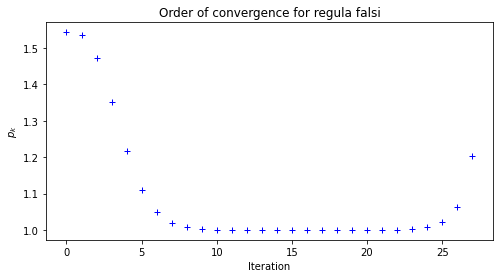

In [20]:
%matplotlib inline
%run regula_falsi_convergence.py
plt.show()